In [36]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])

subset = df[(df.ra<240) & (df.ra>210) & (df.dec > 25) & (df.dec < 40)]
subset

,targetid,obsid,ra,dec,start time,mode
109,3109621,03109621001,234.289167,34.593889,2019-04-11 13:34:45.4,PHOTON
24,11218,00011218002,218.227500,29.589167,2019-04-11 21:05:16.4,PHOTON
48,11218,00011218002,218.227500,29.589167,2019-04-11 22:44:56.2,PHOTON
360,7015270,07015270001,215.700417,32.906111,2019-04-12 16:14:30.8,PHOTON
258,7015271,07015271001,214.999167,32.927778,2019-04-12 16:15:55.8,PHOTON
...,...,...,...,...,...,...
274,7015365,07015365001,215.615000,33.631111,2019-04-12 22:47:30,PHOTON
289,7015366,07015366001,214.528750,33.832500,2019-04-12 22:49:14,PHOTON
311,7015367,07015367001,216.015417,33.936111,2019-04-12 22:50:58.8,PHOTON
300,7015368,07015368001,215.132917,34.306667,2019-04-12 22:52:44.6,PHOTON


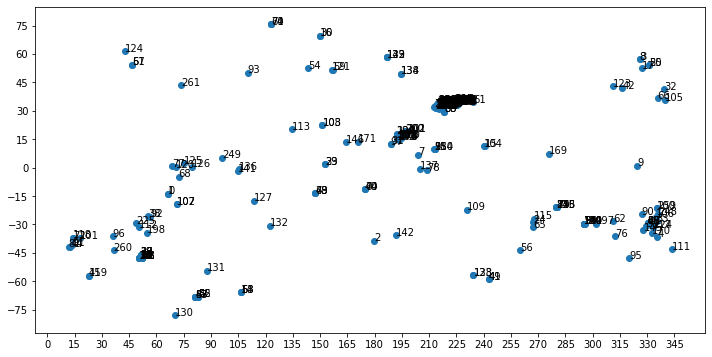

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(df['ra'], df['dec'])
for i in np.arange(df.shape[0]):
    ax.annotate(i, (df['ra'].tolist()[i], df['dec'].tolist()[i]), color='black')

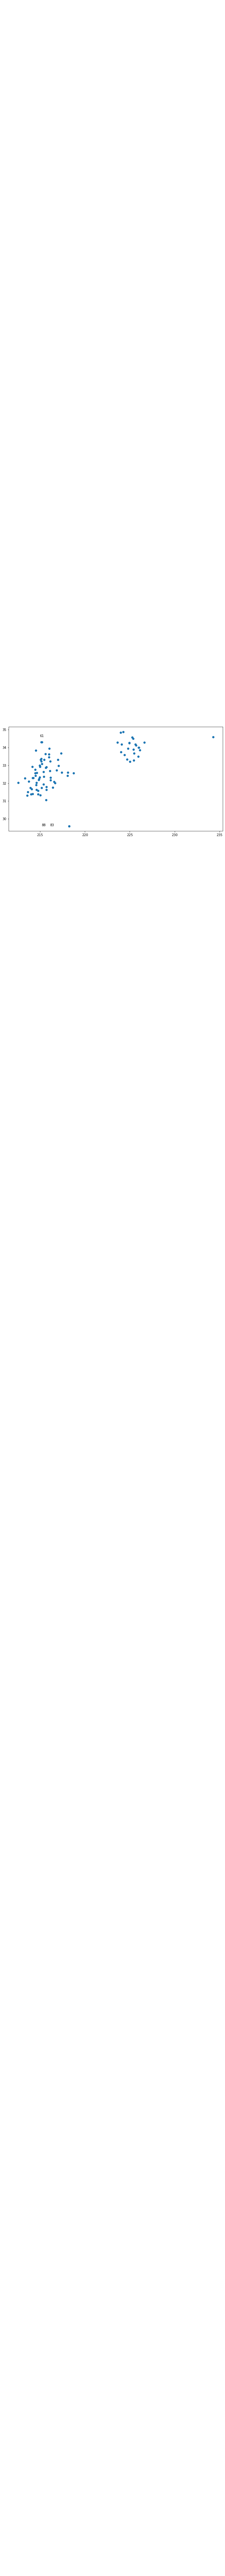

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
# ax.set_xticks(np.arange(0, 360, 15))
# ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(subset['ra'], subset['dec'])
for i in np.arange(subset.shape[0]):
    ax.annotate(i, (subset['ra'].tolist()[i], df['dec'].tolist()[i]), color='black')

In [39]:
subset[(df.ra<230) & (df.ra>220) & (df.dec > 32) & (df.dec < 35)].shape

C:\Users\Joheen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(23, 6)

In [40]:
import os
from shutil import copyfile
subset2 = subset[(df.ra<230) & (df.ra>220) & (df.dec > 31) & (df.dec < 35)]
hduls = []
c = 0
for i, row in subset2.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
#             copyfile('events/'+file, 'testing/' + str(c) + '.evt.gz')
            c += 1

C:\Users\Joheen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


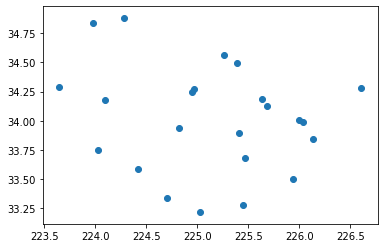

In [9]:
plt.scatter(subset2['ra'], subset2['dec'])
labels = subset2['obsid'].tolist()
for i in np.arange(subset2.shape[0]):
    ax.annotate(labels[i], (subset2['ra'].tolist()[i], subset2['dec'].tolist()[i]), color='black')

In [44]:
import os
from shutil import copyfile
subset3 = subset[(df.ra<220) & (df.ra>210) & (df.dec > 31) & (df.dec < 35)]
hduls = []
c = 0
for i, row in subset3.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
            copyfile('events/'+file, 'subset3/' + str(c) + '.evt.gz')
            c += 1

C:\Users\Joheen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


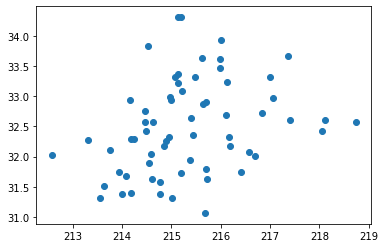

In [45]:
plt.scatter(subset3['ra'], subset3['dec'])
labels = subset3['obsid'].tolist()
for i in np.arange(subset3.shape[0]):
    ax.annotate(labels[i], (subset3['ra'].tolist()[i], subset3['dec'].tolist()[i]), color='black')

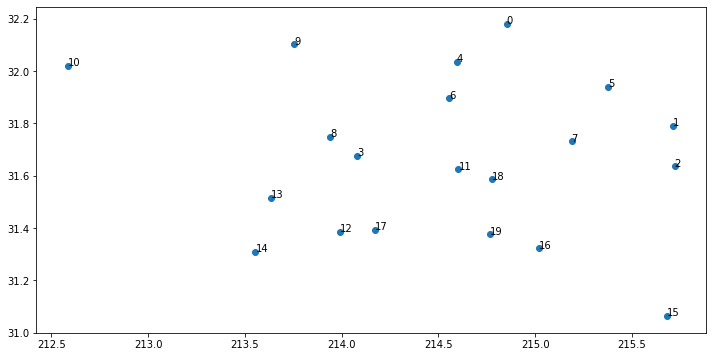

In [55]:
#lower-left quadrant
subset3_1 = subset3[(subset3.ra<216) & (subset3.ra>210) & (subset3.dec > 31) & (subset3.dec < 32.25)]
c = 0
for i, row in subset3_1.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
            copyfile('events/'+file, 'subset3/subset3_1/' + str(c) + '.evt.gz')
            c += 1
            
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(subset3_1['ra'], subset3_1['dec'])
for i in np.arange(subset3_1.shape[0]):
    ax.annotate(i, (subset3_1['ra'].tolist()[i], subset3_1['dec'].tolist()[i]), color='black')

In [58]:
subset3_1

,targetid,obsid,ra,dec,start time,mode
271,7015276,07015276001,214.853750,32.180000,2019-04-12 16:24:41.2,PHOTON
262,7015281,07015281001,215.711667,31.790278,2019-04-12 16:33:26.3,PHOTON
245,7015282,07015282001,215.721250,31.635833,2019-04-12 16:35:10,PHOTON
272,7015283,07015283001,214.080000,31.676111,2019-04-12 16:36:56.4,PHOTON
236,7015284,07015284001,214.595417,32.036111,2019-04-12 16:38:40.6,PHOTON
283,7015285,07015285001,215.375833,31.940278,2019-04-12 16:40:26.4,PHOTON
287,7015287,07015287001,214.555000,31.895833,2019-04-12 16:43:56,PHOTON
240,7015288,07015288001,215.188750,31.731667,2019-04-12 16:45:40.2,PHOTON
243,7015289,07015289001,213.940833,31.749167,2019-04-12 16:47:24.8,PHOTON
268,7015346,07015346001,213.753750,32.102500,2019-04-12 21:11:00.4,PHOTON


In [57]:
np.max(subset3_1['ra'])-np.min(subset3_1['ra'])

3.1362499999999898

In [59]:
np.max(subset3_1['dec'])-np.min(subset3_1['dec'])

1.1147222222222197

In [63]:
data = fits.open('subset3/subset3_1/sector3_1.fits')[0].data
xs = []
ys = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i][j] != 0:
            xs.append(i)
            ys.append(j)
print(len(xs))
print(len(ys))

382
382


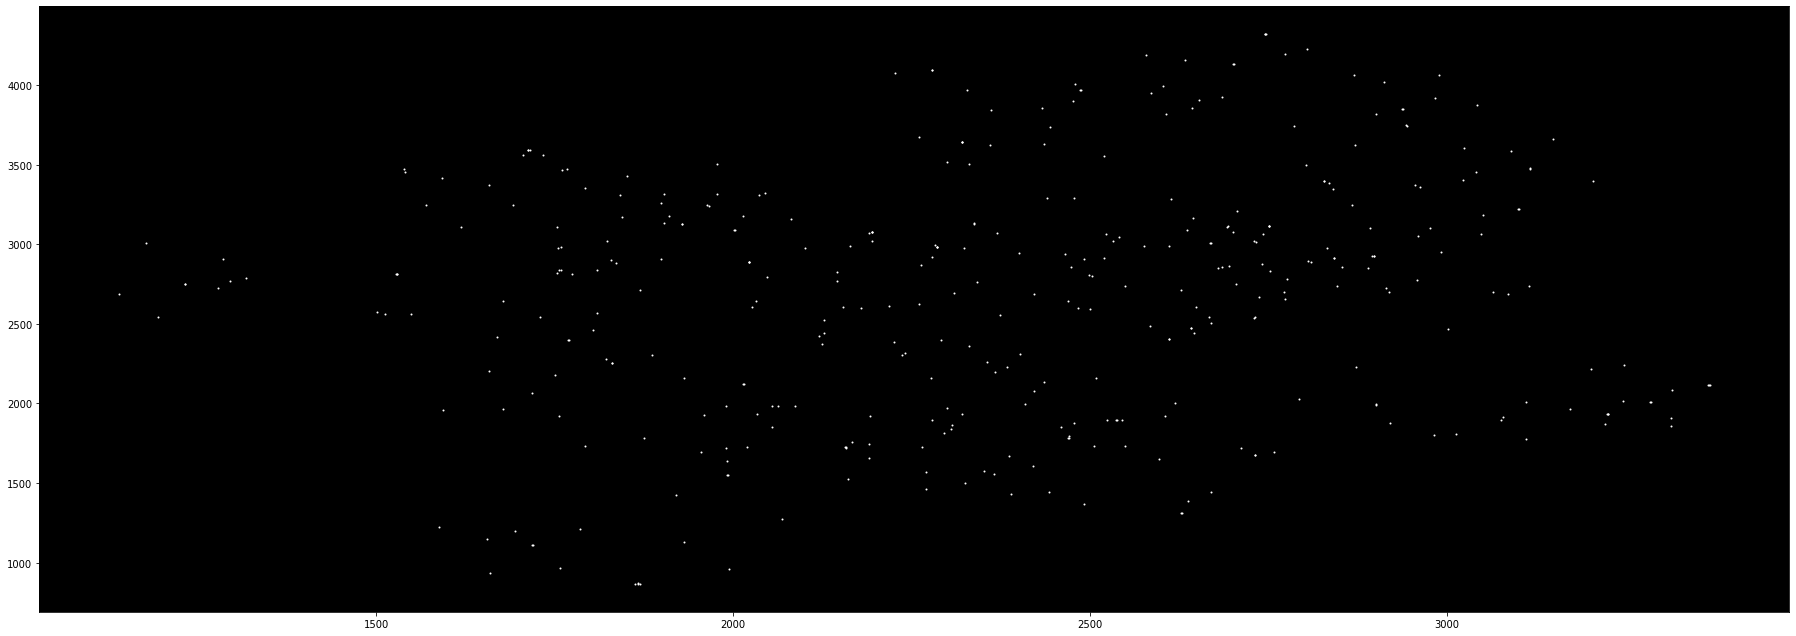

In [65]:
fig, ax = plt.subplots(figsize=(31.36, 11.14))
ax.set_facecolor('black')
plt.scatter(xs, ys, color='white', s=1)
plt.savefig('mosaic_3-1.png')

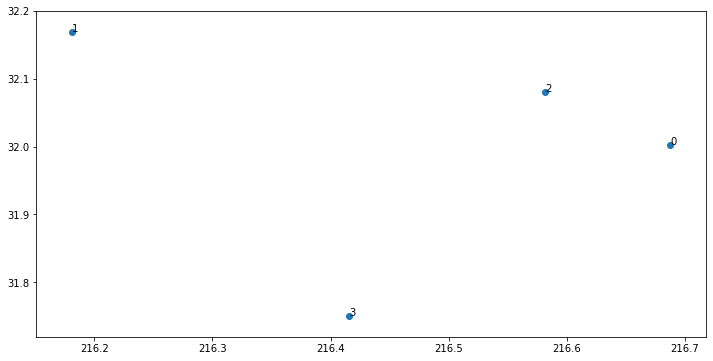

In [69]:
#lower-right quadrant
subset3_2 = subset3[(subset3.ra>216) & (subset3.ra<219) & (subset3.dec > 31) & (subset3.dec < 32.25)]
c = 0
for i, row in subset3_2.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
            copyfile('events/'+file, 'subset3/subset3_2/' + str(c) + '.evt.gz')
            c += 1
            
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(subset3_2['ra'], subset3_2['dec'])
for i in np.arange(subset3_2.shape[0]):
    ax.annotate(i, (subset3_2['ra'].tolist()[i], subset3_2['dec'].tolist()[i]), color='black')

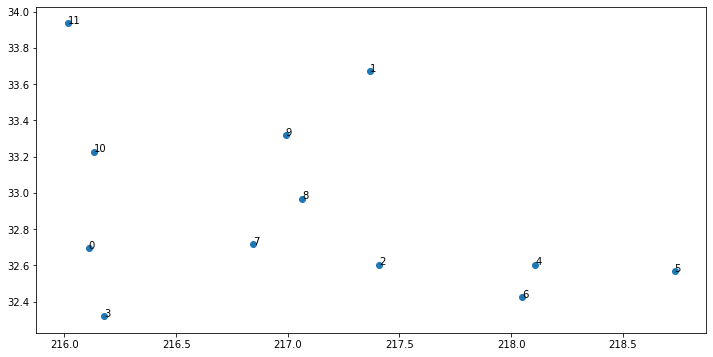

In [71]:
#upper-right quadrant
subset3_3 = subset3[(subset3.ra>216) & (subset3.ra<219) & (subset3.dec > 32.25) & (subset3.dec < 34)]
c = 0
for i, row in subset3_3.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
            copyfile('events/'+file, 'subset3/subset3_3/' + str(c) + '.evt.gz')
            c += 1
            
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(subset3_3['ra'], subset3_3['dec'])
for i in np.arange(subset3_3.shape[0]):
    ax.annotate(i, (subset3_3['ra'].tolist()[i], subset3_3['dec'].tolist()[i]), color='black')

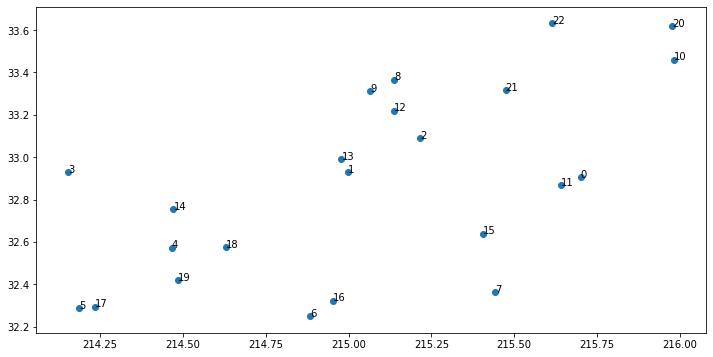

In [75]:
#upper-left quadrant
subset3_4 = subset3[(subset3.ra<216) & (subset3.ra>214) & (subset3.dec > 32.25) & (subset3.dec < 33.8)]
c = 0
for i, row in subset3_4.iterrows():
    obsid = row['obsid']
    for file in os.listdir('events'):
        if obsid in file:
            hduls.append(fits.open('events/'+file))
            copyfile('events/'+file, 'subset3/subset3_4/' + str(c) + '.evt.gz')
            c += 1
            
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(subset3_4['ra'], subset3_4['dec'])
for i in np.arange(subset3_4.shape[0]):
    ax.annotate(i, (subset3_4['ra'].tolist()[i], subset3_4['dec'].tolist()[i]), color='black')

In [78]:
np.max(subset3_4['ra'])-np.min(subset3_4['ra'])

1.8291666666666515

In [81]:
np.max(subset3_4['dec'])-np.min(subset3_4['dec'])

1.3808333333333351

In [80]:
data = fits.open('subset3/subset3_4/subset3_4.fits')[0].data
xs = []
ys = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i][j] != 0:
            xs.append(i)
            ys.append(j)
print(len(xs))
print(len(ys))

498
498


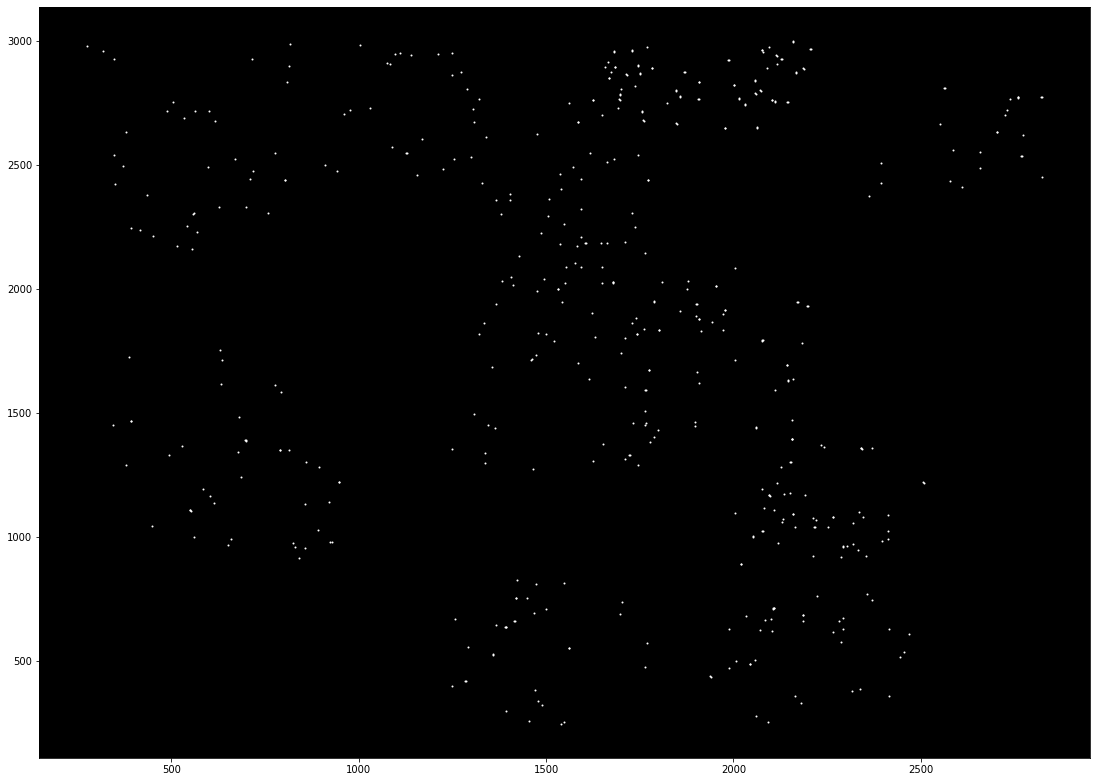

In [82]:
fig, ax = plt.subplots(figsize=(18.829, 13.808))
ax.set_facecolor('black')
plt.scatter(xs, ys, color='white', s=1)
plt.savefig('mosaic_3-4.png')